In [1]:
import os
import numpy as np
import torch
import time
import pickle
import matplotlib.pyplot as plt
from torch.utils.data import dataloader, dataset
from collections import OrderedDict
from torch.autograd import Variable
from pathlib import Path
from tqdm import tqdm
import cv2

%matplotlib inline

In [2]:
pix2pixhd_dir = Path('../src/pix2pixHD/')

import sys
sys.path.append(str(pix2pixhd_dir))

%load_ext autoreload
%autoreload 2

In [3]:
from data.data_loader import CreateDataLoader
from models.models import create_model
import util.util as util
from util.visualizer import Visualizer
from util import html

In [18]:
with open('../data/test_opt.pkl', mode='rb') as f:
    opt = pickle.load(f)
    
iter_path = os.path.join(opt.checkpoints_dir, opt.name, 'iter.txt')

In [19]:
opt.batchSize = 1
opt.loadSize = 512
opt.label_nc = 0
# opt.name = 'yaosyBody'
opt

Namespace(aspect_ratio=1.0, batchSize=1, checkpoints_dir='../checkpoints/', cluster_path='features_clustered_010.npy', data_type=32, dataroot='../data/source/', display_winsize=512, engine=None, export_onnx=None, feat_num=3, fineSize=512, fine_size=480, gpu_ids=[0], how_many=50, input_nc=3, instance_feat=False, isTrain=False, label_feat=False, label_nc=0, loadSize=512, load_features=False, max_dataset_size=inf, model='pix2pixHD', nThreads=1, n_blocks_global=9, n_blocks_local=3, n_clusters=10, n_downsample_E=4, n_downsample_global=4, n_local_enhancers=1, name='target', nef=16, netG='global', ngf=64, niter_fix_global=0, no_flip=True, no_instance=True, norm='instance', ntest=inf, onnx=None, output_nc=3, phase='test', resize_or_crop='scale_width', results_dir='../results/', serial_batches=True, tf_log=False, use_dropout=False, verbose=False, which_epoch='latest')

In [20]:
def model_inference(inputs, params):
    """
    inputs: a list contains imgs e.g. [img1, img2, ...]
    params: parameters to change
    """
    num_input = len(inputs)
    data_label = torch.Tensor(inputs)
    data_label = tensor_inputs.unsqueeze(1)
    data_inst = torch.zeros(num_input)
    data = {'label': data_label, 'inst': data_inst}

In [22]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
visualizer = Visualizer(opt)
# create website
web_dir = os.path.join(opt.results_dir, opt.name, '%s_%s' % (opt.phase, opt.which_epoch))
webpage = html.HTML(web_dir, 'Experiment = %s, Phase = %s, Epoch = %s' % (opt.name, opt.phase, opt.which_epoch))

CustomDatasetDataLoader
dataset [AlignedDataset] was created


In [23]:
model = create_model(opt)

GlobalGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace)
    (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (11): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (12): ReLU(inplace)
    (13): Conv2d(512, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (14): InstanceNorm2d(1024, eps=1e-05, momentum=0.1, affine=False, track_runn

In [24]:
for i, data in enumerate(tqdm(dataset)):
    generated = model.inference(data['label'], data['inst'])
    visuals = OrderedDict([('input_label', util.tensor2label(data['label'][0], opt.label_nc)),
                           ('synthesized_image', util.tensor2im(generated.data[0]))])
    img_path = data['path']
    visualizer.save_images(webpage, visuals, img_path)
webpage.save()
torch.cuda.empty_cache()

  0%|          | 0/4001 [00:00<?, ?it/s]../src/pix2pixHD/models/pix2pixHD_model.py:130: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_label = Variable(input_label, volatile=infer)
100%|██████████| 4001/4001 [07:47<00:00,  8.51it/s]


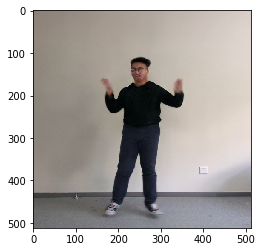

In [25]:
plt.imshow(visuals['synthesized_image'])

In [26]:
data['label'].size()

torch.Size([1, 3, 512, 512])